In [1]:
import sys 
sys.path.append(r'/Users/kostastsampourakis/Desktop/code/Python/projects/neuralssm/src/neuralssm')
from jax import numpy as jnp # type: ignore
from jax import random as jr # type: ignore
from jax.scipy.special import factorial as fac # type: ignore
from dynamax.utils.bijectors import RealToPSDBijector # type: ignore
from simulators.ssm import SPN, LGSSM
from util.param import sample_prior, initialize
import tensorflow_probability.substrates.jax.distributions as tfd # type: ignore
import tensorflow_probability.substrates.jax.bijectors as tfb # type: ignore

import scienceplots # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib_inline # type: ignore
plt.style.use(['science', 'ieee'])
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## SSM form

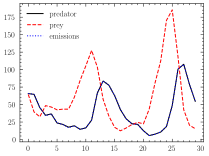

In [2]:
from simulators.lvssm import setup

sim_setup = setup(2, 1, 0, ['d3'])
spn = sim_setup['ssm']
props = sim_setup['props']
inputs = sim_setup['inputs']
param_names = sim_setup['exp_info']['param_names']
is_constrained_tree = sim_setup['exp_info']['constrainers']

key = jr.PRNGKey(0)
key, subkey = jr.split(key)
xparam = sample_prior(subkey, props)[0]

key, subkey = jr.split(jr.PRNGKey(0))
params = sample_prior(subkey, props, 100)
key, subkey = jr.split(key)
dt_obs = 1.0
num_timesteps = 30
states, emissions = spn.simulate(subkey, params[0], num_timesteps)

plt.plot(states[:, 0], label = 'predator')
plt.plot(states[:, 1], label = 'prey')
plt.plot(emissions, label = 'emissions')
plt.legend()
plt.show()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 
import simulators.lvssm, simulators.lvssm_params
from util.train import get_sds
from util.param import to_train_array
from util.sample import map_sims
from jax import random as jr
from jax import numpy as jnp
from jax import vmap
from jax.tree_util import tree_map
from util.plot import plot_hist_marginals
from inference.nde import SequentialNeuralLikelihood as SNL

learner = SNL(props, spn, lag=-1)
num_samples = 10

lvssm_params_sample = sample_prior(subkey, learner.props, num_samples)


# Sample emissions and create dataset
key, subkey = jr.split(key)
keys = jr.split(key, num_samples)
# emissions = vmap(map_sims, in_axes=(0,0,None,None,None))(keys, cond_params, learner.props, learner.ssm, num_timesteps)
sds = get_sds(subkey, None, learner, num_samples, lvssm_params_sample, num_timesteps)
cond_params, emissions = sds

In [9]:
print(props.dynamics.log_rates.props.constrainer)

None
